In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Data 26.11.2023..xlsx')
df.head(10)
area_counts = df['area'].value_counts()
mask = df['area'].map(area_counts) >= 10
df = df[mask]
df.head(10)

,area,sq_meters,room_number,price,heating,floor,total_floors
0,Opština Čukarica,95 m2,3.0,750€,Gas,2,2.0
1,Opština Novi Beograd,40 m2,1.5,400€,CG,1,5.0
2,Opština Novi Beograd,68 m2,3.0,1.400€,CG,7,7.0
3,Opština Vračar,84 m2,3.0,700€,CG,1,5.0
4,Opština Novi Beograd,40 m2,1.0,900€,CG,17,NaN
5,Opština Novi Beograd,75 m2,3.0,600€,CG,VPR,4.0
6,Opština Savski venac,54 m2,2.0,800€,TA,5,5.0
7,Opština Stari grad,50 m2,2.0,950€,CG,6,NaN
8,Opština Novi Beograd,80 m2,3.0,1.050€,CG,7,8.0
9,Opština Voždovac,50 m2,2.0,350€,NaN,4,NaN


In [277]:
df = df.dropna(subset=['area'])
df['price'] = df['price'].str.replace('€', '').str.replace('.', '')
df['sq_meters'] = df['sq_meters'].str.replace(' m2', '').str.replace(',', '.')
df['room_number'] = df['room_number'].str.replace('+', '')
df['floor'] = df['floor'].replace({'PSUT' : 0, 'PR' : 0, 'VPR' : 0, 'SUT' : 0}) #['PSUT', 'PR', 'VPR'], 0, inplace=True
df[['price', 'sq_meters', 'room_number', 'floor']] = df[['price', 'sq_meters', 'room_number', 'floor']].astype(float)
df['area'] = df['area'].astype(str)
df['area'] = df['area'].str.replace('Opština ', '')
df = df.sort_values(by=['price'], ignore_index=True)
df = df.dropna()
df.describe()

C:\Users\marko\AppData\Local\Temp\ipykernel_40464\191219079.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('€', '').str.replace('.', '')
C:\Users\marko\AppData\Local\Temp\ipykernel_40464\191219079.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['room_number'] = df['room_number'].str.replace('+', '')


,sq_meters,room_number,price,floor,total_floors
count,473.000000,473.000000,473.000000,473.000000,473.000000
mean,62.146237,2.295983,802.122622,2.968288,6.331924
std,27.103845,0.895566,346.698731,3.052689,4.480392
min,15.000000,0.500000,250.000000,0.000000,1.000000
25%,45.000000,2.000000,500.000000,1.000000,4.000000
50%,60.000000,2.000000,750.000000,2.000000,5.000000
75%,72.000000,3.000000,1100.000000,4.000000,7.000000
max,320.000000,5.000000,1500.000000,24.000000,30.000000


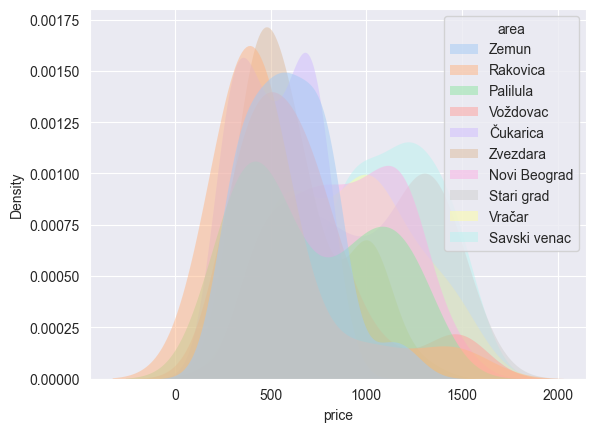

In [278]:
# Distribution check per area
sns.set_style("darkgrid")
sns.set_palette("pastel")

sns.kdeplot(
    data = df,
    x = df['price'],
    hue=df['area'],
    fill=True, 
    common_norm=False, 
    palette="pastel",
    alpha=.5, 
    linewidth=0,
)
plt.show()

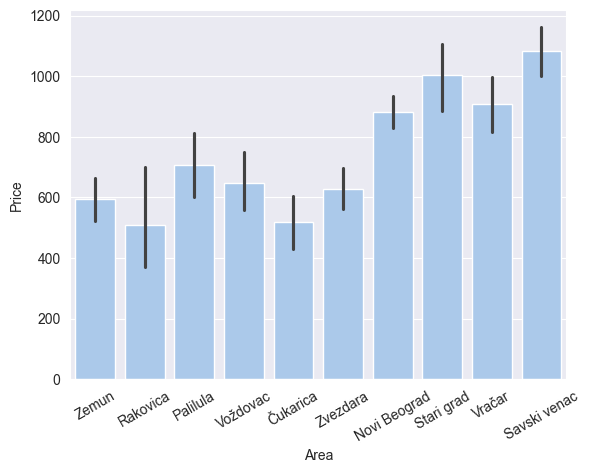

In [279]:
# Mean price per area
sns.barplot(
    data= df,
    x = df['area'],
    y = df['price'],
)
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()

array([[<AxesSubplot:title={'center':'sq_meters'}>,
        <AxesSubplot:title={'center':'room_number'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'total_floors'}>, <AxesSubplot:>]],
      dtype=object)

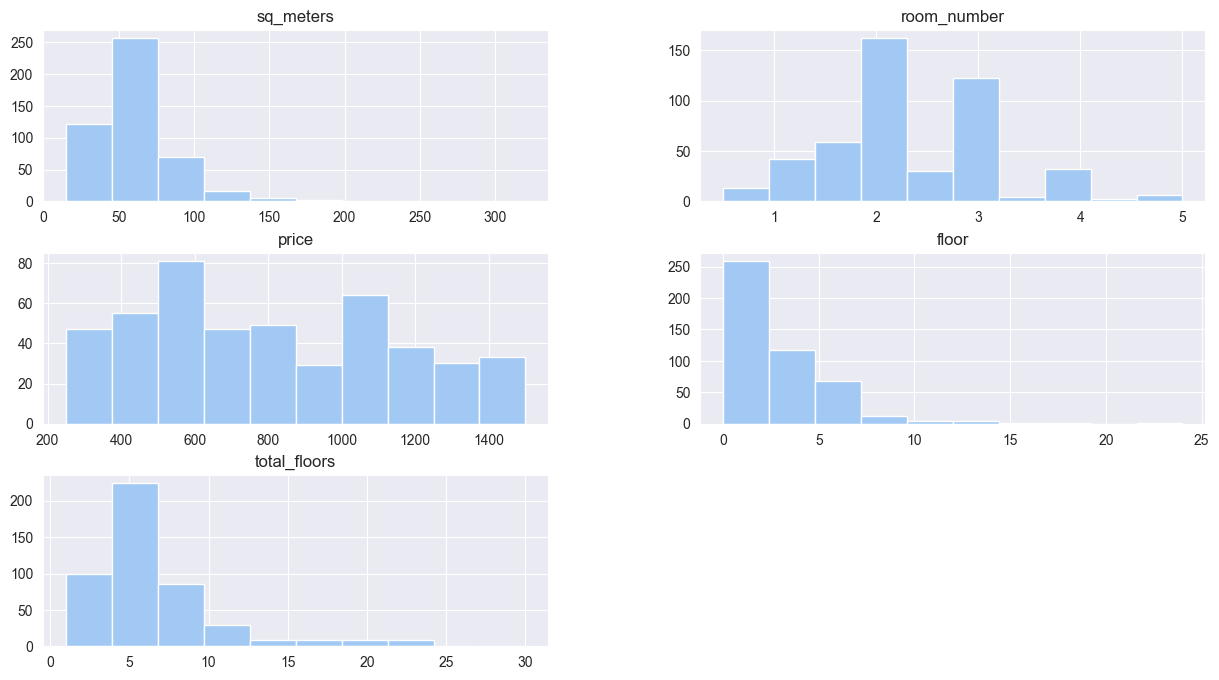

In [280]:
df.hist(figsize=(15, 8))

In [281]:
heating_counts = df['heating'].value_counts()
mask = df['heating'].map(heating_counts) >= 16
df = df[mask]

<AxesSubplot:>

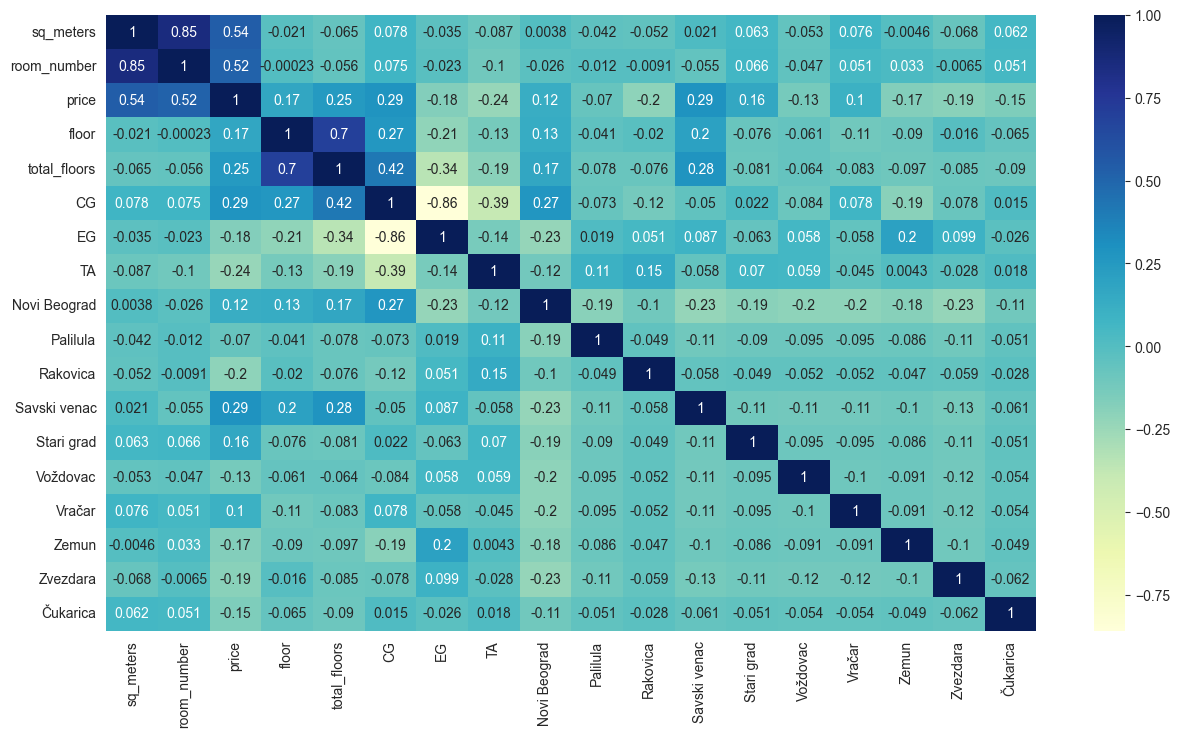

In [282]:
df_processed = df.join(pd.get_dummies(df.heating)).drop(['heating'], axis=1)
df_processed = df_processed.join(pd.get_dummies(df_processed.area)).drop(['area'], axis = 1)
plt.figure(figsize=(15, 8))
sns.heatmap(df_processed.corr(), annot=True, cmap='YlGnBu')

In [283]:
df_processed.to_excel("Processed data 26.11.2023..xlsx", index=False)

In [284]:
df_new = pd.read_excel('Data 04.01.2024..xlsx')
area_counts = df_new['area'].value_counts()
mask = df_new['area'].map(area_counts) >= 10
df_new = df_new[mask]
df_new = df_new.dropna(subset=['area'])
df_new['price'] = df_new['price'].str.replace('€', '').str.replace('.', '')
df_new['sq_meters'] = df_new['sq_meters'].str.replace(' m2', '').str.replace(',', '.')
df_new['room_number'] = df_new['room_number'].str.replace('+', '')
df_new['floor'] = df_new['floor'].replace({'PSUT' : 0, 'PR' : 0, 'VPR' : 0, 'SUT' : 0}) #['PSUT', 'PR', 'VPR'], 0, inplace=True
df_new[['price', 'sq_meters', 'room_number', 'floor']] = df_new[['price', 'sq_meters', 'room_number', 'floor']].astype(float)
df_new['area'] = df_new['area'].astype(str)
df_new['area'] = df_new['area'].str.replace('Opština ', '')
df_new = df_new.sort_values(by=['price'], ignore_index=True)
df_new = df_new.dropna()
df_new.describe()

C:\Users\marko\AppData\Local\Temp\ipykernel_40464\1016753708.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new['price'] = df_new['price'].str.replace('€', '').str.replace('.', '')
C:\Users\marko\AppData\Local\Temp\ipykernel_40464\1016753708.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new['room_number'] = df_new['room_number'].str.replace('+', '')


,sq_meters,room_number,price,floor,total_floors
count,446.000000,446.000000,446.000000,446.000000,446.000000
mean,58.115410,2.215247,756.578475,2.778027,6.096413
std,20.382927,0.846455,321.617138,2.295587,3.893196
min,3.543000,0.500000,250.000000,0.000000,1.000000
25%,45.000000,2.000000,500.000000,1.000000,4.000000
50%,55.000000,2.000000,700.000000,2.000000,5.000000
75%,70.000000,3.000000,1000.000000,4.000000,7.000000
max,140.000000,5.000000,1500.000000,12.000000,30.000000


In [285]:
mean_prices_1 = df.groupby('area')['price'].mean().reset_index()
mean_prices_1 = mean_prices_1.rename(columns={'price': "price 26.11.2023"})
mean_prices_2 = df_new.groupby('area')['price'].mean().reset_index()
mean_prices_2 = mean_prices_2.rename(columns={'price': "price 04.01.2024"})
mean_prices_comp = mean_prices_1.merge(mean_prices_2, on='area', how='outer')
mean_prices_comp = mean_prices_comp.dropna()
mean_prices_comp['percentage_change'] = ((mean_prices_comp['price 04.01.2024'] - mean_prices_comp['price 26.11.2023']) / mean_prices_comp['price 26.11.2023']) * 100
mean_prices_comp['percentage_change'] = mean_prices_comp['percentage_change'].map('{:.2f}%'.format)
print(mean_prices_comp)


           area  price 26.11.2023  price 04.01.2024 percentage_change
0  Novi Beograd        876.209677        843.809524            -3.70%
1      Palilula        729.714286        648.823529           -11.09%
3  Savski venac       1092.291667       1068.846154            -2.15%
4    Stari grad        991.714286        947.500000            -4.46%
5      Voždovac        669.846154        665.769231            -0.61%
6        Vračar        918.974359        796.341463           -13.34%
7         Zemun        600.625000        523.783784           -12.79%
8      Zvezdara        625.714286        630.402778             0.75%
9      Čukarica        498.333333        582.692308            16.93%


            area              date        price
0   Novi Beograd  price 26.11.2023   876.209677
1       Palilula  price 26.11.2023   729.714286
2   Savski venac  price 26.11.2023  1092.291667
3     Stari grad  price 26.11.2023   991.714286
4       Voždovac  price 26.11.2023   669.846154
5         Vračar  price 26.11.2023   918.974359
6          Zemun  price 26.11.2023   600.625000
7       Zvezdara  price 26.11.2023   625.714286
8       Čukarica  price 26.11.2023   498.333333
9   Novi Beograd  price 04.01.2024   843.809524
10      Palilula  price 04.01.2024   648.823529
11  Savski venac  price 04.01.2024  1068.846154
12    Stari grad  price 04.01.2024   947.500000
13      Voždovac  price 04.01.2024   665.769231
14        Vračar  price 04.01.2024   796.341463
15         Zemun  price 04.01.2024   523.783784
16      Zvezdara  price 04.01.2024   630.402778
17      Čukarica  price 04.01.2024   582.692308


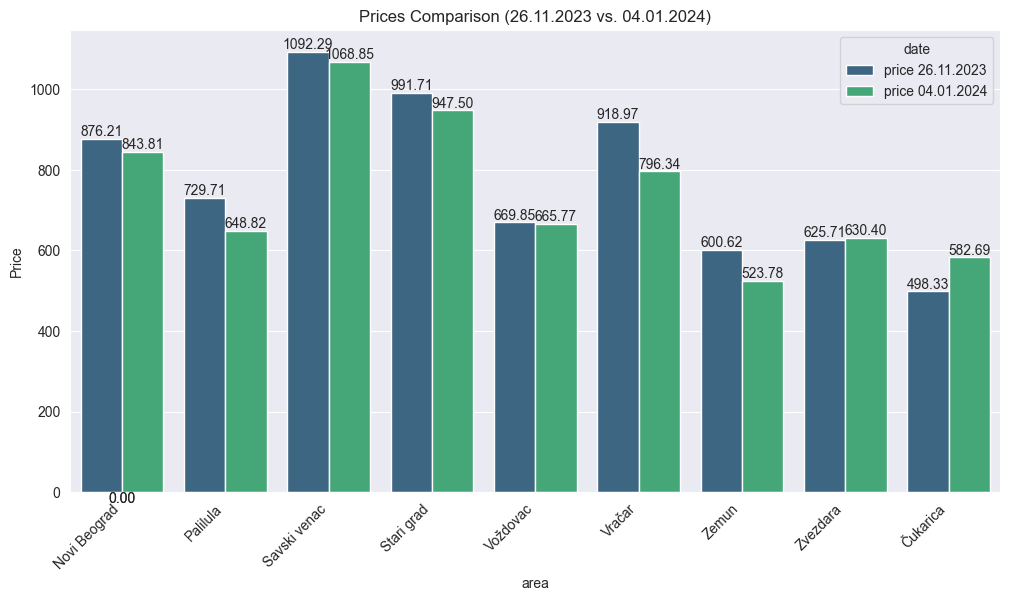

In [286]:
mean_prices_comp_melted = pd.melt(mean_prices_comp[['area', 'price 26.11.2023', 'price 04.01.2024']], id_vars=['area'], var_name='date', value_name='price')
print(mean_prices_comp_melted)

# # Plotting with Seaborn
# plt.figure(figsize=(12, 6))
# sns.barplot(x='area', y='price', hue='date', data=mean_prices_comp_melted, palette='viridis')
# plt.title('Prices Comparison 26.11.2023 vs. 04.01.2024')
# plt.ylabel('Price')
# plt.xticks(rotation=45, ha='right')

# plt.show()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='area', y='price', hue='date', data=mean_prices_comp_melted, palette='viridis')

# Add annotations with differences above the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2

    ax.annotate(f'{height:.2f}', (width, height), ha='center', va='bottom', rotation=20, fontsize=8)

plt.title('Prices Comparison (26.11.2023 vs. 04.01.2024)')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

plt.show()